# Handbook: Methods

### Terms


Liquid trajectory - The states of a liquid over time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

### Geometric mean 
Source: https://en.wikipedia.org/wiki/Geometric_mean

Originally found in: https://www.nature.com/articles/s41598-020-65404-3

Releveant for: Taking the mean of two scales when they are scaled differently

In mathematics, the geometric mean is a mean or average, which indicates the central tendency or typical value of a set of numbers by using the product of their values (as opposed to the arithmetic mean which uses their sum). The geometric mean is defined as the nth root of the product of n numbers, i.e., for a set of numbers x1, x2, ..., xn, the geometric mean is defined as

${\displaystyle \left(\prod _{i=1}^{n}x_{i}\right)^{\frac {1}{n}}={\sqrt[{n}]{x_{1}x_{2}\cdots x_{n}}}}$


For instance, the geometric mean of two numbers, say 2 and 8, is just the square root of their product, that is, ${\displaystyle {\sqrt {2\cdot 8}}=4}$. As another example, the geometric mean of the three numbers 4, 1, and 1/32 is the cube root of their product (1/8), which is 1/2, that is, ${\displaystyle {\sqrt[{3}]{4\cdot 1\cdot 1/32}}=1/2}$.



### Separability index

Source/first found in: https://www.nature.com/articles/s41598-020-65404-3

Used to quantify separability of inputs in a reservoir

### Point wise separtion property


Source: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.183.2874&rep=rep1&type=pdf

Used to quantify the separation of input

Simply subtract two liquid states at time t that result from two different input patterns and take the length of the resulting vector by using the L2 norm $(||\cdot||)$

In [2]:
def pointwise_distance(liquid_1, liquid_2):
    #liquid_x is a 2d array containing the state of the liquid in axis 0 and time over axis 1
    # The state of each liquid at time t must in other words be represented as a 1d array
    
    distance = liquid_1 - liquid_2
    
    distance = np.linalg.norm(distance,2,0)

    return distance

Quote from the paper: "In order to determine the distance $d(u, v)$ between two spike trains u and v, we replaced
each spike by a gaussian exp$(-(t/t )^2)$ for $tau =  5 ms$ (to be precise, u and v are convolved
with the gaussian kernel exp$(-(t/t )^2
))$ and denoted $d(u, v)$ as the distance of the resulting two continuous functions in the L2-norm (divided by the maximal lengths 0.5 sec of the spike trains u and v)."

### Average distance as dependent on liquid size (for classical 1d cellular automata)

The maximal distance two states of a classical cellular automata can have happens when all cells in one state is 0 and all cells in the other state is 1. Max distance is thus a simple function of automata size


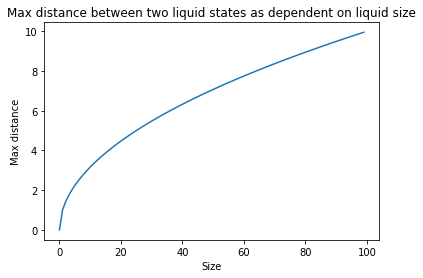

In [3]:
max_size = 100
max_distance = np.zeros(max_size)

for i0 in range(max_size):
    liquid_1 = np.zeros(i0)
    liquid_2 = np.ones(i0)
    max_distance[i0] = pointwise_distance(liquid_1, liquid_2)
plt.title("Max distance between two liquid states as dependent on liquid size")
plt.ylabel("Max distance")
plt.xlabel("Size")
plt.plot(max_distance)

Given random, independent liquid states the relationship should be similar although the distance will be smaller

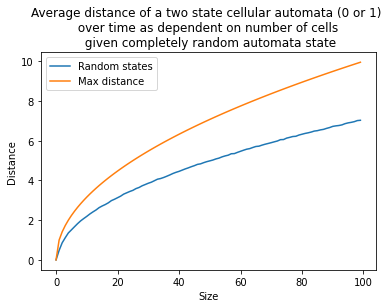

In [4]:
max_size = 100
average_distance_over_time = np.zeros(max_size)
for i0 in range(max_size):
    liquid_1 = np.random.randint(0,2,(i0,1000))
    liquid_2 = np.random.randint(0,2,(i0,1000))
    average_distance_over_time[i0] = np.mean(pointwise_distance(liquid_1, liquid_2))

plt.title("Average distance of a two state cellular automata (0 or 1) \n over time as dependent on number of cells \n given completely random automata state")
plt.ylabel("Distance")
plt.xlabel("Size")
plt.plot(average_distance_over_time, label = "Random states")
plt.plot(max_distance, label = "Max distance")
plt.legend()

It should be noted that different types of liquid will have different average on states. Rule 110 in 1D cellular automatas does for example have more on states on average than rule 30?? check??

### Separability through time

Point wise separability is only concerned with separability between two liquid trajectories at time t. It does not give any indication on whether the states being compared have previously been visited during the liquid's own trajectory or during the other liquid's trajectory. While liquid computing does not require states to be revisited, it is still usefull to identify cases where this does happen so as to assess liquid quality.

To do this we can compare all liquid states in one trajectory to all liquid states in another trajectory and compute a plane or heatmap signifying the distance between all states.

In [5]:
def historywise_separability(liquid_1_history, liquid_2_history):
    # inputs are 2D arrays containing the states of a liquid over time. Axis 0 is the liquid and axis 1 is time
    
    # To quickly compute all possible comparisons the 2D arrays are repeated over a new axis (axis 2) such that axis 2
    # contains a number of repeats of the liquid history equal to the time steps in the other liquid history (the time steps should be the same for both liquids)
    block_1 = np.repeat(liquid_1_history[:,:,np.newaxis],liquid_2_history.shape[1], axis = 2)
   
    block_2 = np.repeat(liquid_2_history[:,:,np.newaxis],liquid_1_history.shape[1], axis = 2)

    # One of the cubes created above is then rotated such that the states align so that comparisons can be made between all states
    # To do: explain better
    block_diff = block_1 - np.rot90(block_2,1,(1,2))
    
    return np.linalg.norm(block_diff, 2, 0)


In [6]:
def plot_distanceplane(liquid_1_history, liquid_2_history, color_range = None, colormap_size = None):

    z = historywise_separability(liquid_1_history, liquid_2_history)

    x, y = np.meshgrid(range(z.shape[0]), range(z.shape[1]))

    # show hight map in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if color_range != None:
        ax.set_zlim(color_range[0],color_range[1])
    ax.plot_surface(x, y, z)
    plt.title('z as 3d height map')
    plt.show()

    # show hight map in 2d
    if colormap_size != None:
        plt.figure(figsize = colormap_size)
    else:
        plt.figure()
    plt.title('z as 2d heat map')
    if color_range != None:
        p = plt.imshow(z, vmin = color_range[0], vmax = color_range[1])
    else:
        p = plt.imshow(z)
    plt.ylabel("Liquid 1 states")
    plt.xlabel("Liquid 2 states")
    plt.colorbar(p)
    plt.show()

##### Testing historywise_separabilty

To understand the ouput of the functions created above I've found it useful to view some tests of the function

Below I have created two idealised simple liquids. In both liquids the starting state is: 5 cells from position 0 to, but not including, 5, are 1 while the rest are 0

Liquid_1 is static, while in liquid_2, for each time step all cells containing 1 are moved 1 cell in the same direction. They are always moved in the same direction, with open boundry conditions, thus moving in a "circle" on the 1D liquid.

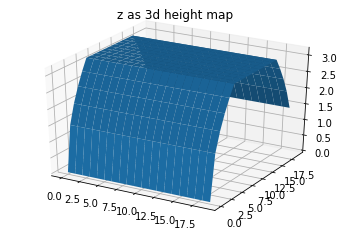

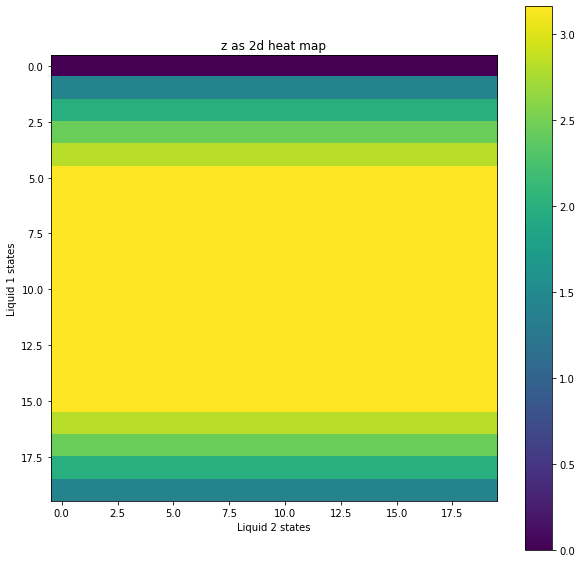

In [7]:
liquid_size = 20
sim_end = 20

liquid_1 = np.zeros(liquid_size)
liquid_1[0:5] = 1
liquid_2 = np.zeros(liquid_size)
liquid_2[0:5] = 1


liquid_1_history = np.zeros((liquid_size,sim_end))
liquid_2_history = np.zeros((liquid_size, sim_end))

for i0 in range(sim_end):
    liquid_1_history[:,i0] = liquid_1
    liquid_2_history[:,i0] = liquid_2
    
    liquid_1 = np.roll(liquid_1,1)
    #liquid_2 = np.roll(liquid_2,-1)

    
plot_distanceplane(liquid_1_history, liquid_2_history, colormap_size = (10,10))

    


In the resulting plane and heatmap we can see how the states are compared. On the y axis we have the states of liquid 2 and on the x axis we have the states of liquid 1. Each x - y position gives the distance between the two states at their respective time. 

The upper band going over the x axis is all 0's. This signifies that the first state of liquid 1 is identical to all states in liquid 2. Given that the two liquid starts with the same starting stating, and that liquid 1 does not change this is what would be expected. Similarly we can see that as liquid 1 changes and the overlap with the static liquid 1 becomes smaller and smaller the distance increases until it is maximal and then decreases again when liquid 1 begins to overlap liquid 1 again.
An issue here is that the overlap from each side gives identical distances, but are different which is information lost that might be usefull for a readout mechanism. This also means that one strictly speaking cannot identify cycles with this method, unless the distance becomes 0 at repeated points in time



##### self comparison - cycles

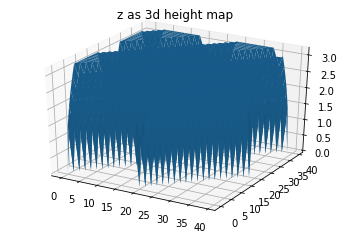

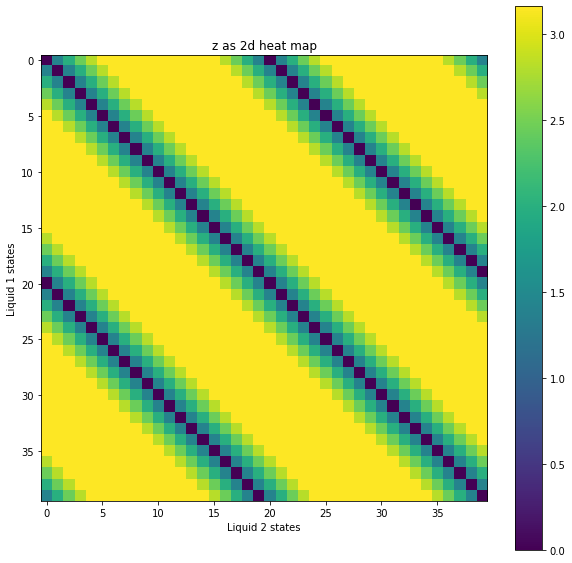

In [8]:
liquid_size = 20
sim_end = 40

liquid_1 = np.zeros(liquid_size)
liquid_1[0:5] = 1

liquid_1_history = np.zeros((liquid_size,sim_end))

for i0 in range(sim_end):
    liquid_1_history[:,i0] = liquid_1
    
    liquid_1 = np.roll(liquid_1,1)

plot_distanceplane(liquid_1_history, liquid_1_history, colormap_size = (10,10))

Plotting the history of a liquid against itself makes it easy to identify indications of cycles. In the plot above, liquid 1 has been plottet against itself and has been simulated for 40 steps instead of 20. 

The fact that the liquid is compared with itself is evident from the black diagonal line going from the top left corner to the bottom right corner. As the diagonal gives the coordinates where the two liquids are at the same time point the distance should obiviously be 0 given that we are comparing a liquid with itself.
More interesting are the other diagonal lines that form a repeating pattern over the plot. This shows how the liquid is returning to the same state again and repeats itself in a cycle.

#### Similarity plane on cellular automata


We can now look at more interesting liquids in the form of cellular automata

Below I have made a class that implements a 1D cellular automata which one can inject new cell values into to test memory and similar properties

In [9]:

rule_110 = {"111":0, "110":1, "101":1, "100":0, "010":1, "001":1, "011":1, "000":0}
rule_90 = {"111":0, "110":1, "101":0, "100":1, "011":1, "010":0, "001":1,"000":0}
rule_30 = {"111":0, "110":0, "101":0, "100":1, "011":1, "010":1, "001":1,"000":0}
rule = rule_90
#rule_110 = {"111":1, "110":1, "011":0, "101":1, "100":0, "010":0, "001":1, "000":1}

class Automata_1d:
    def __init__(self, universe_in_starting_state, rule):
        self.rulebook = {"110":{"111":0, "110":1, "101":1, "100":0, "010":1, "001":1, "011":1, "000":0}, "90":{"111":0, "110":1, "101":0, "100":1, "011":1, "010":0, "001":1,"000":0}, "30":{"111":0, "110":0, "101":0, "100":1, "011":1, "010":1, "001":1,"000":0}}
        self.rule = self.rulebook[rule]
        self.universe = np.uint64(universe_in_starting_state)
        
        universe_size = len(self.universe)
        
        
        self.states = list(self.rule.keys())
        self.neighbourhoodsize = len(self.states[0])
        self.neighbourhoodstate = np.zeros((universe_size, self.neighbourhoodsize), dtype = np.uint64)
        
        self.nr_of_transitions_to_1 = 0
        for key in self.rule:
            self.nr_of_transitions_to_1 += self.rule[key]
        
        self.rule_matrix = np.zeros((universe_size, self.neighbourhoodsize, self.nr_of_transitions_to_1), dtype = np.uint64)
        self.rule_state_matrix = np.zeros((universe_size, self.neighbourhoodsize, self.nr_of_transitions_to_1), dtype = np.uint64)
        
        j = 0
        for i0, key in enumerate(self.rule):
            if self.rule[key] == 1:
                for i1 in range(len(key)):
                    self.rule_matrix[:, i1, j] += int(key[i1])
                j += 1
                
        
    def do_neighbourhood(self):
        
        for i0 in range(self.neighbourhoodsize):
            self.neighbourhoodstate[:,i0] = np.roll(self.universe, i0-1)
            
    def update_universe(self):
        self.do_neighbourhood()
        
        for i0 in range(self.nr_of_transitions_to_1):
        
            self.rule_state_matrix[:,:,i0] = self.neighbourhoodstate == self.rule_matrix[:,:,i0]
        self.universe = np.sum(np.prod(self.rule_state_matrix,1),1)
        
    def kill_cell(self, index):
        self.rule_matrix[index,:,:] +=2
        
    def inject_data_lossy(self, data_array):
        #injecting data is done by adding an array of equal size to the universe
        self.universe = self.universe + data_array
        self.universe = self.universe > 0
    
    def inject_data_lossless(self, data_array):
        # inputs where cell states in the universe and data array and input both = 1 -> 0
        self.universe = (self.universe + data_array)
        doublet_filter = self.universe < 2
        self.universe *= doublet_filter
        
        
  

#### Testing rules

#### Rule 90

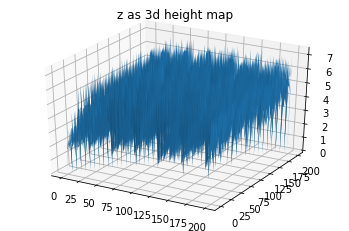

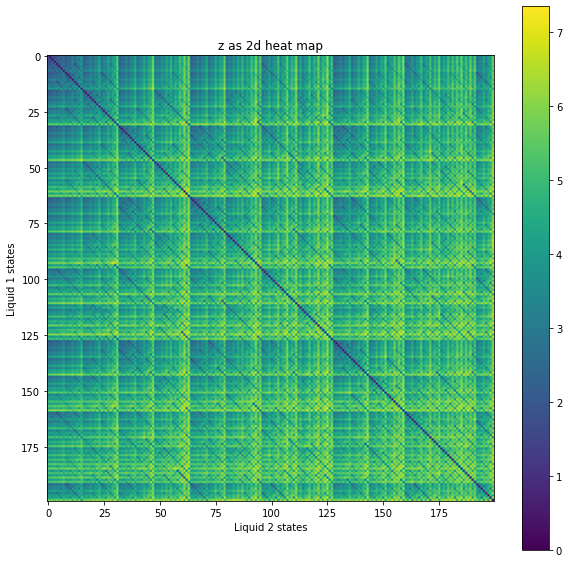

In [10]:
rule_comparison_size = 100
rule_comparison_starting_state = np.zeros(100)
rule_comparison_starting_state[49] = 1

automata_rule_90 = Automata_1d(rule_comparison_starting_state, "90")

rule_comparison_sim_length = 200

rule_90_history = np.zeros((rule_comparison_size, rule_comparison_sim_length))

for i0 in range(rule_comparison_sim_length):
    rule_90_history[:,i0] = automata_rule_90.universe
    automata_rule_90.update_universe()

plot_distanceplane(rule_90_history, rule_90_history, colormap_size = (10,10))

Rule 90 appears to be somewhat cyclical, but given that there are no completely black diagonal lines other than the central one the cycles does not appear to be self identical but are rather self similar.

#### Rule 30

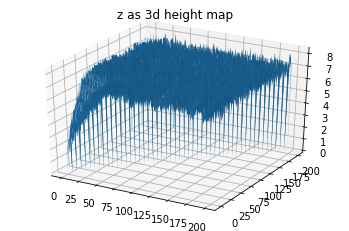

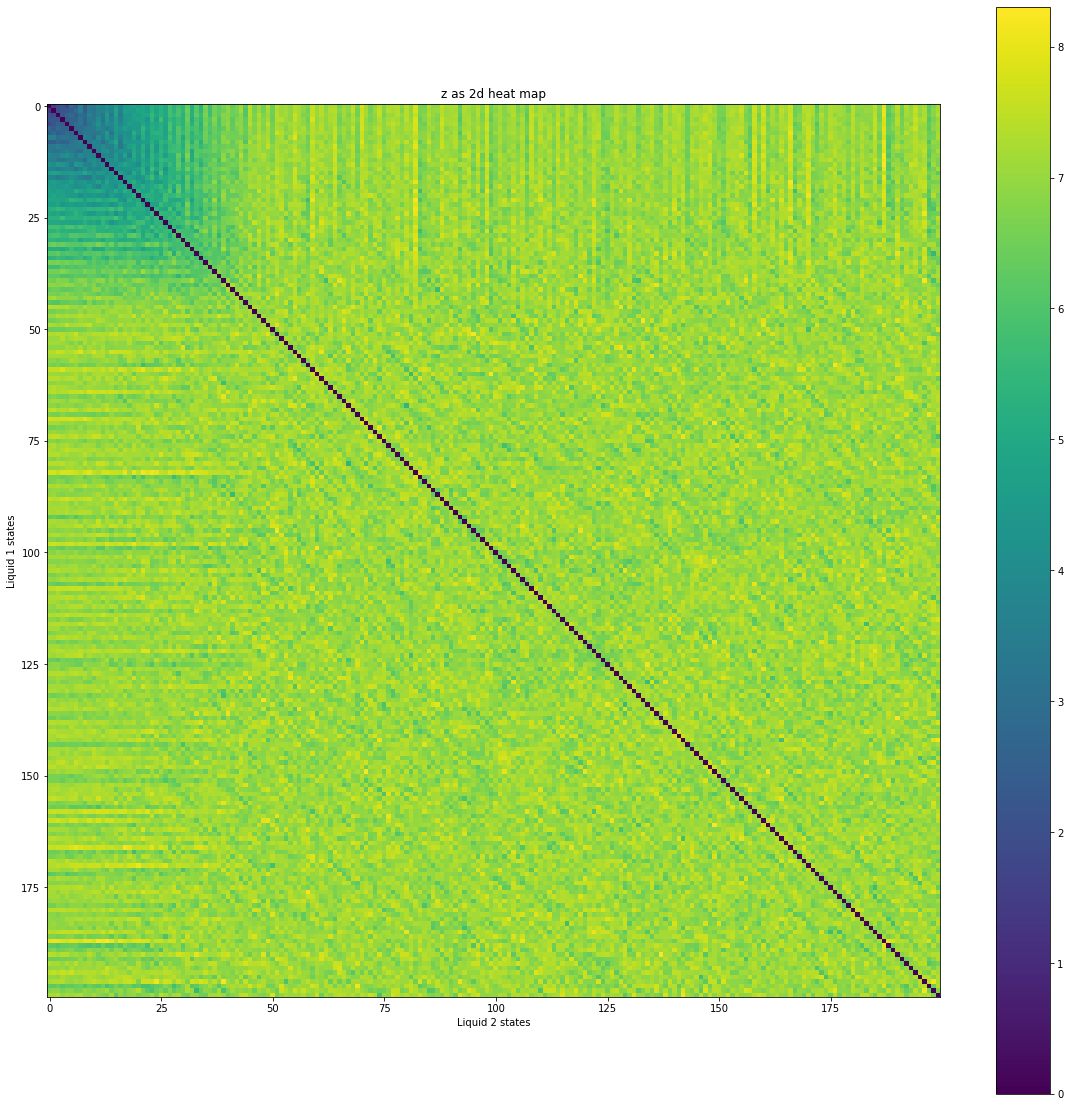

In [11]:

automata_rule_30 = Automata_1d(rule_comparison_starting_state, "30")

rule_comparison_sim_length = 200

rule_30_history = np.zeros((rule_comparison_size, rule_comparison_sim_length))

for i0 in range(rule_comparison_sim_length):
    rule_30_history[:,i0] = automata_rule_30.universe
    automata_rule_30.update_universe()

plot_distanceplane(rule_30_history, rule_30_history, colormap_size = (20,20))

Rule 30 is aperiodic and chaotic. We can see this as the states diverge completely and ends up at an high average distance from all other states

### Rule 110

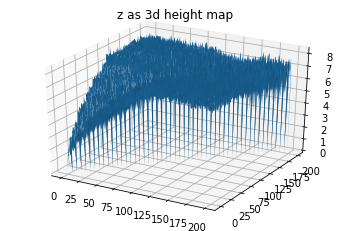

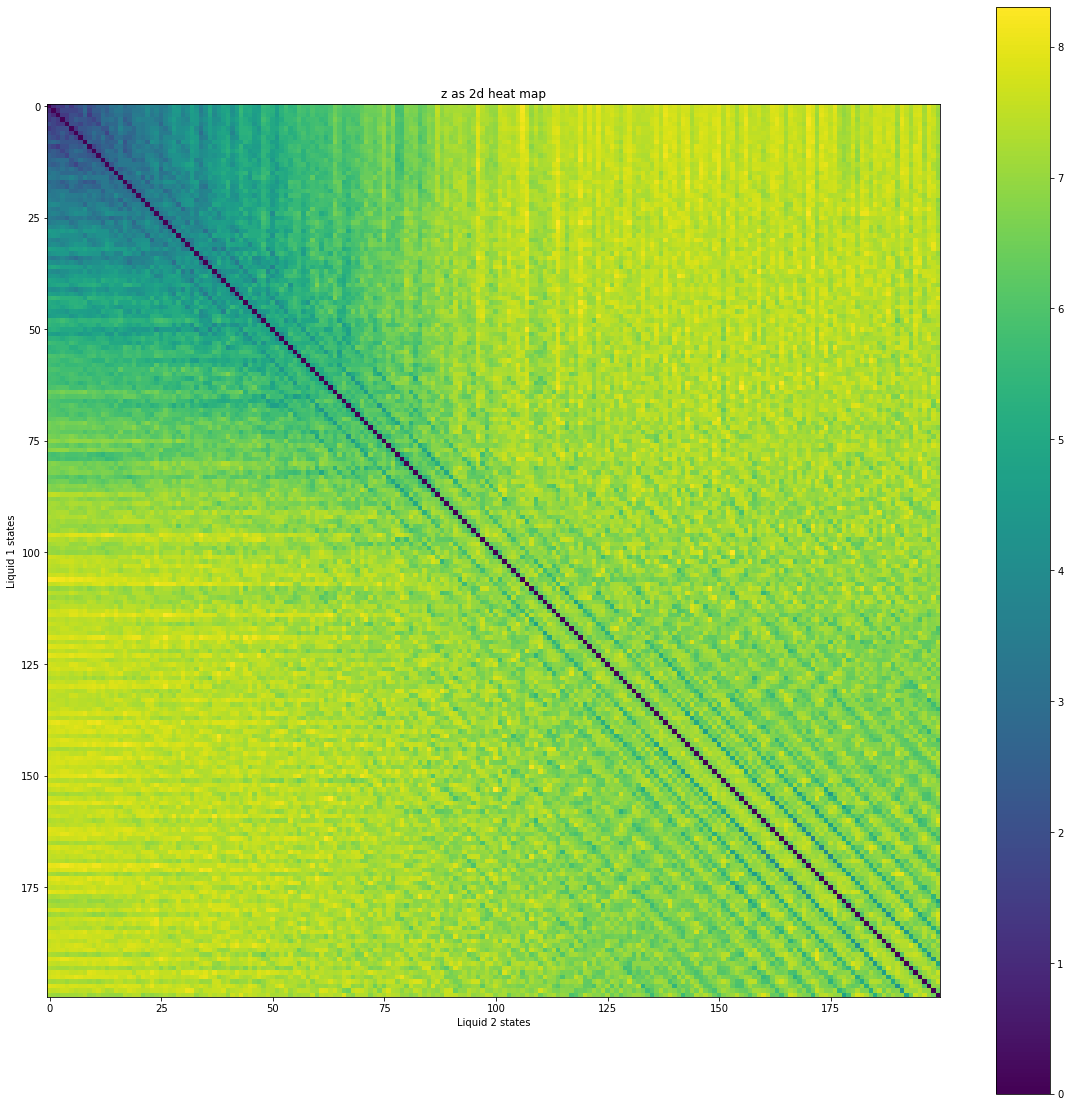

In [12]:

automata_rule_110 = Automata_1d(rule_comparison_starting_state, "110")

rule_comparison_sim_length = 200

rule_110_history = np.zeros((rule_comparison_size, rule_comparison_sim_length))

for i0 in range(rule_comparison_sim_length):
    rule_110_history[:,i0] = automata_rule_110.universe
    automata_rule_110.update_universe()

plot_distanceplane(rule_110_history, rule_110_history, colormap_size = (20,20))

Rule 110 is at the edge of chaos and is turing complete. An interesting aspect from the color map is that states that are close in time appears to stay somewhat closer than what can be seen in rule 30. In addition there appears to be indications of fading cycles as seen by the weaker diagonal lines that are close to the central line.

In [13]:

# testing XOR
input_location_1 = 50
input_location_2 = 48
universe_size = 100

# Create starting states for the different automata
# The numbers indicate the condition
startingstate_10 = np.zeros(universe_size)
startingstate_10[input_location_1] = 1




startingstate_01 = np.zeros(universe_size)
startingstate_01[input_location_2] = 1

startingstate_00 = np.zeros(universe_size)

startingstate_11 = np.zeros(universe_size)
startingstate_11[input_location_1] = 1
startingstate_11[input_location_2] = 1

rule = "90"
# initiate the cellular automata
automata_10 = Automata_1d(startingstate_10, rule)
automata_00 = Automata_1d(startingstate_00, rule)
automata_01 = Automata_1d(startingstate_01, rule)
automata_11 = Automata_1d(startingstate_11, rule)

#just making a list
automatas = [automata_10, automata_01, automata_11, automata_00]

nr_of_automata = len(automatas)
sim_length = 200


automata_10_history = np.zeros((universe_size, sim_length))
automata_01_history = np.zeros((universe_size, sim_length))
automata_11_history = np.zeros((universe_size, sim_length))
automata_00_history = np.zeros((universe_size, sim_length))

automatas_history = [automata_10_history, automata_01_history, automata_11_history, automata_00_history]



In [14]:
# run all automatas
for i0 in range(sim_length):
    for i1 in range(len(automatas)):
            automatas_history[i1][:,i0] = automatas[i1].universe
            automatas[i1].update_universe()

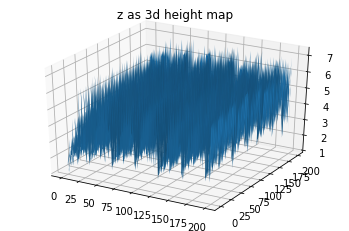

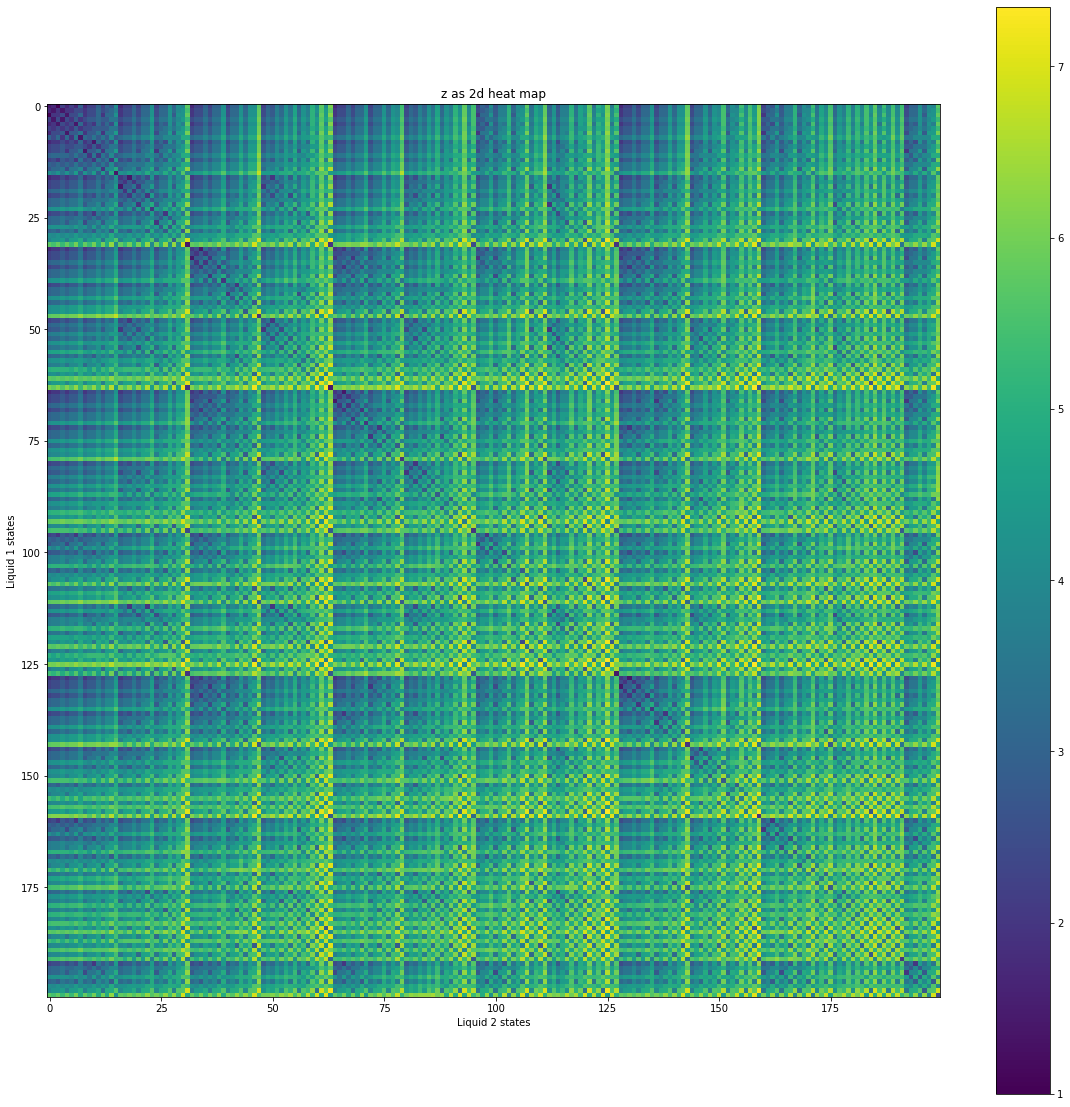

In [15]:
# plots 10 vs 01
plot_distanceplane(automatas_history[0], automatas_history[1], colormap_size = (20,20))

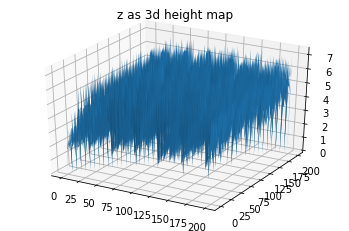

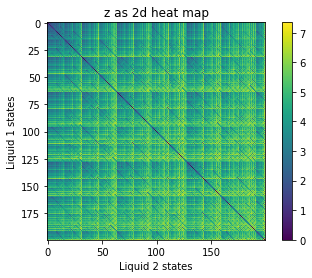

In [16]:
plot_distanceplane(automatas_history[0], automatas_history[0])

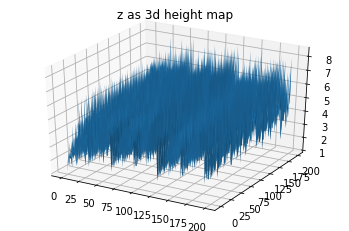

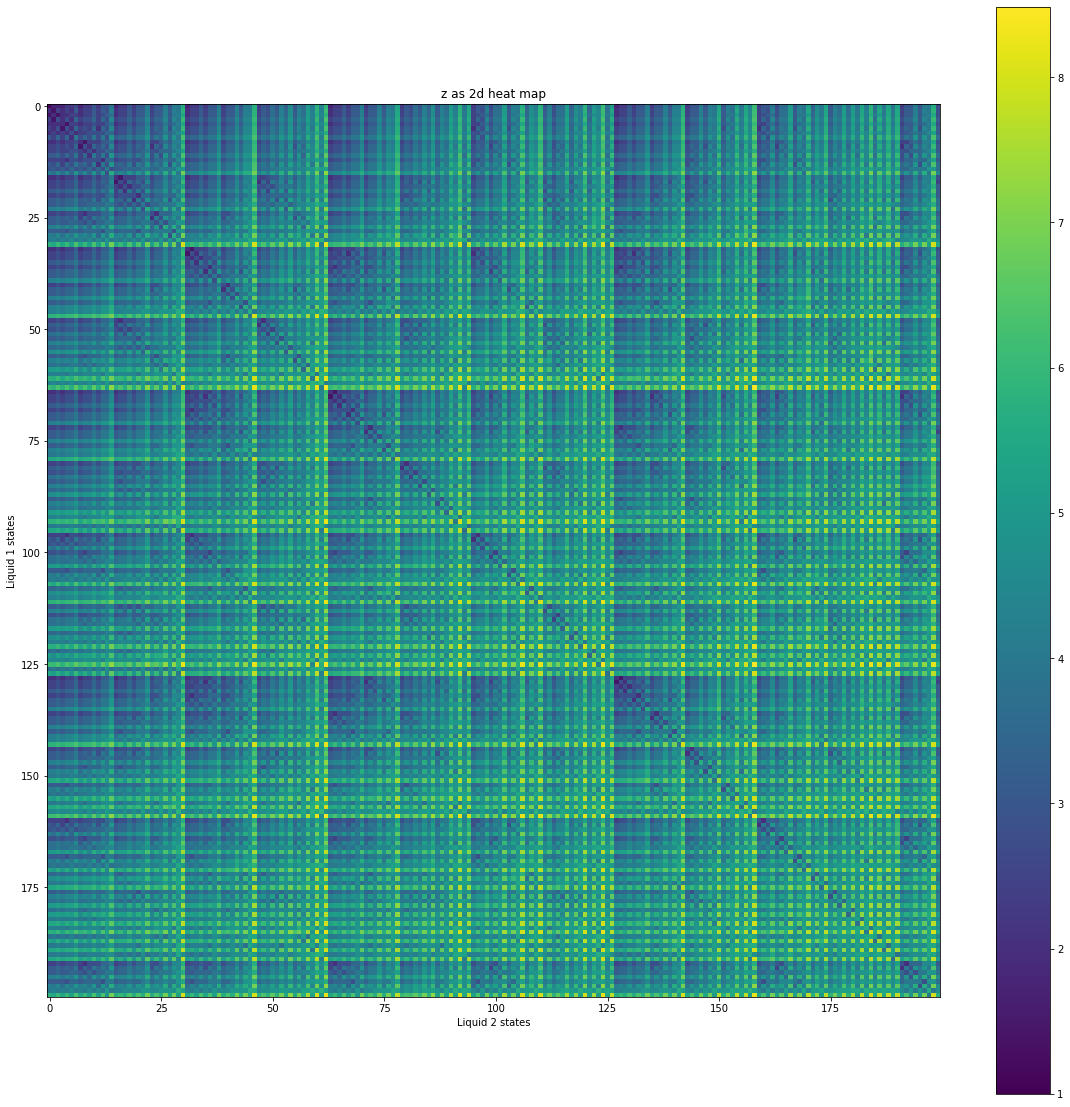

In [17]:
#plots 10 vs 11
plot_distanceplane(automatas_history[0], automatas_history[2], colormap_size = (20,20))

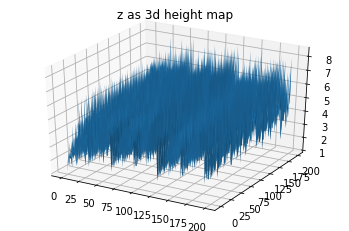

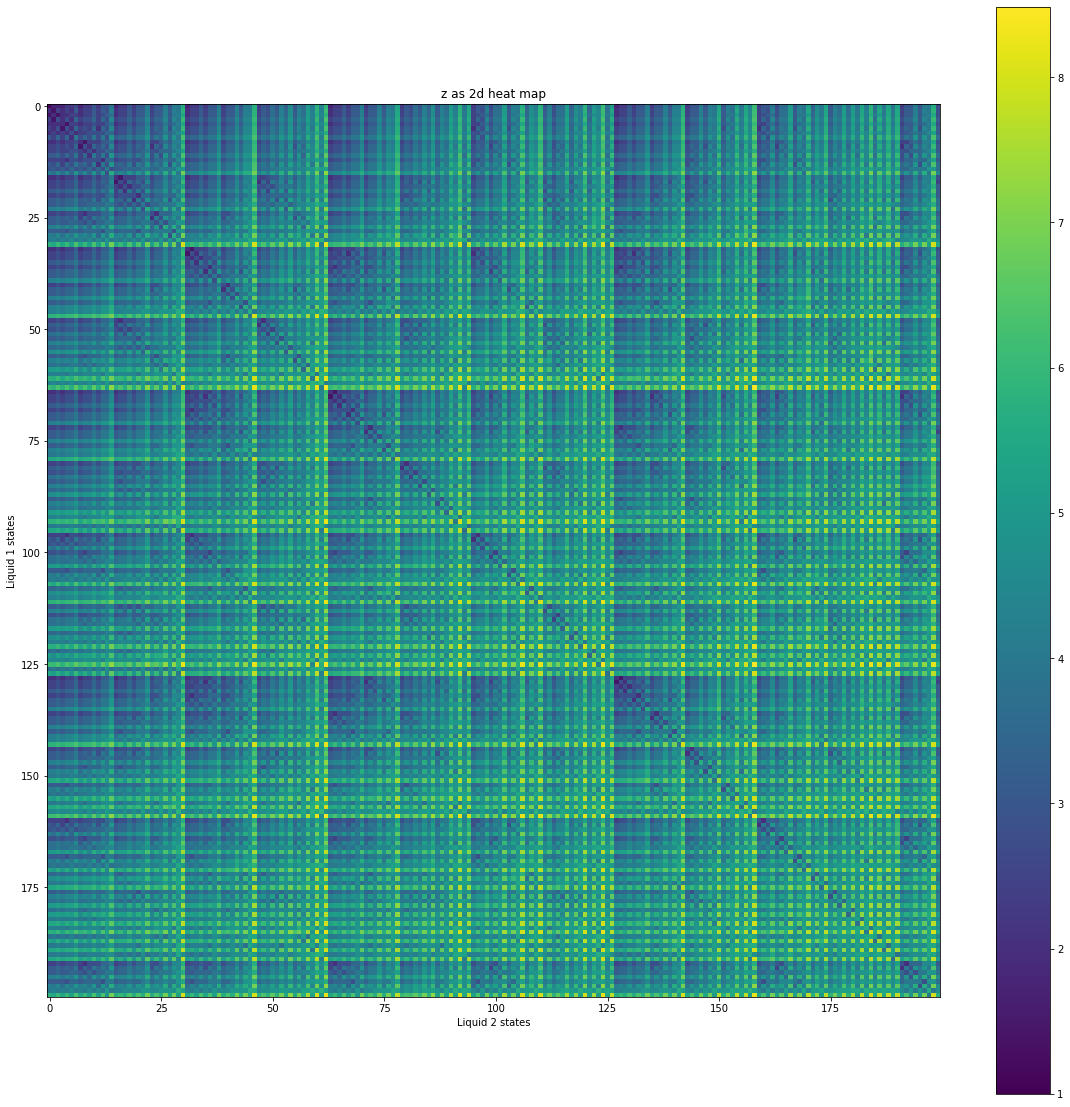

In [18]:
# plots 01 vs 11
plot_distanceplane(automatas_history[1], automatas_history[2], colormap_size = (20,20))

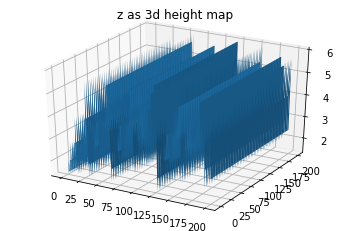

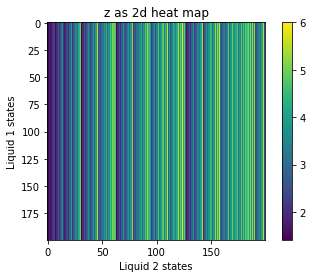

In [19]:
plot_distanceplane(automatas_history[3], automatas_history[2])

In [20]:
universe_size = 10
sim_length = 500

nr_of_automatas = 4


starting_states = []
for i0 in range(nr_of_automatas):
    starting_states.append(np.random.randint(0,2,(universe_size)))


rule = "30"
# initiate the cellular automata

automatas = []
for i0 in range(nr_of_automatas):
    automatas.append(Automata_1d(starting_states[i0], rule))


automatas_history = []

for i0 in range(nr_of_automatas):
    automatas_history.append(np.zeros((universe_size, sim_length)))


In [21]:
# run all automatas
for i0 in range(sim_length):
    for i1 in range(len(automatas)):
            automatas_history[i1][:,i0] = automatas[i1].universe
            automatas[i1].update_universe()

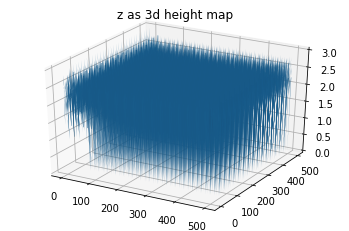

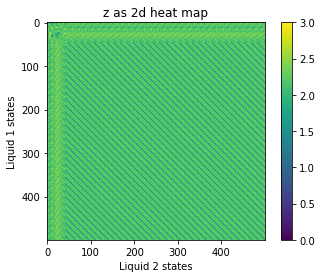

In [22]:
plot_distanceplane(automatas_history[0], automatas_history[1])

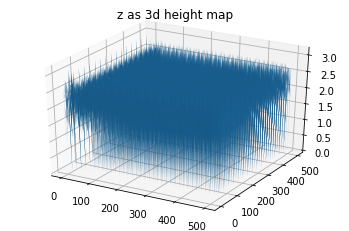

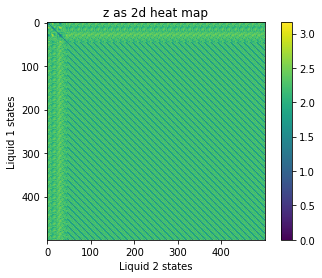

In [23]:
plot_distanceplane(automatas_history[0], automatas_history[0])

In [24]:
def plot_distanceplane_comparsison(liquid_histories, color_range = None):
    # liquid_histories: list of tuples for comparison
    z_list = []
    for i0 in range(len(liquid_histories)):
        z_list.append(historywise_separability(liquid_histories[i0][0], liquid_histories[i0][1]))
    print(z_list[0][0].shape)
    x, y = np.meshgrid(range(z_list[0].shape[0]), range(z_list[0].shape[1]))
    
    
    # show hight map in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
   
    if color_range != None:
        ax.set_zlim(color_range[0],color_range[1])
    
    for i0 in range(len(liquid_histories)):
        ax.plot_surface(x, y, z_list[i0])
    plt.title('z as 3d height map')
    plt.show()

    # show hight map in 2d
    plt.figure()
    plt.title('z as 2d heat map')
    if color_range != None:
        p = plt.imshow(z_list[0]-z_list[1], vmin = color_range[0], vmax = color_range[1])
    else:
        p = plt.imshow(z_list[0]>z_list[1])
    plt.colorbar(p)
    plt.show()

In [25]:
universe_size = 90
sim_length = 100

nr_of_automatas = 4


starting_states = []
for i0 in range(nr_of_automatas):
    starting_states.append(np.random.randint(0,2,(universe_size)))


rule = "110"
# initiate the cellular automata

automatas = []
for i0 in range(nr_of_automatas):
    automatas.append(Automata_1d(starting_states[i0], rule))


automatas_history = []

for i0 in range(nr_of_automatas):
    automatas_history.append(np.zeros((universe_size, sim_length)))


# injections_start signifies when to start injecting the data stream
injection_start = 0
injection_end = 60
injections_t = 0
nr_of_injections = 2

prototype_1 = np.random.rand(universe_size, injection_end - injection_start) > 0.7
prototype_2 = np.random.rand(universe_size, injection_end - injection_start) > 0.7

injections = []
for i0 in range(nr_of_injections):
    injections.append(prototype_1 * (np.random.rand(universe_size, injection_end - injection_start) > 0.1))
for i0 in range(nr_of_injections):
    injections.append(prototype_2 * (np.random.rand(universe_size, injection_end - injection_start) > 0.1))
#data_streams = np.zeros((nr_of_injections, universe_size, injection_end - injection_start))

#data_streams[0,:11,:] = 1
#data_streams[1,11:,:] = 1                       
# run all automatas
for i0 in range(sim_length):
    if i0 >= injection_start and i0 < injection_end:
            for i2 in range(len(injections)):
                automatas[i2].inject_data_lossy(injections[i2][:,injections_t])
            #print(injections_t, i0)
            injections_t += 1
    for i1 in range(len(automatas)):
           
                    
            automatas_history[i1][:,i0] = automatas[i1].universe
            automatas[i1].update_universe()

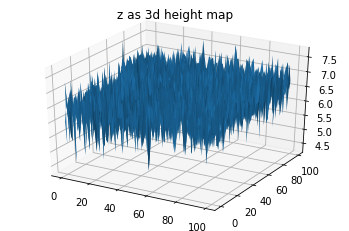

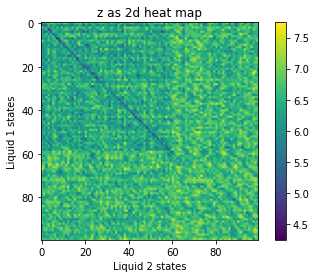

In [26]:
plot_distanceplane(automatas_history[0], automatas_history[1])

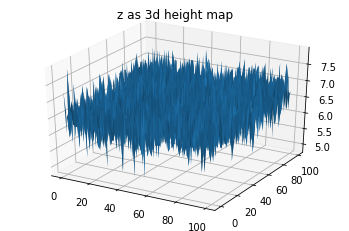

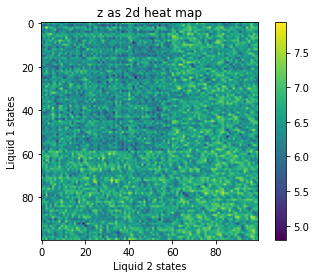

In [27]:
plot_distanceplane(automatas_history[0], automatas_history[3])

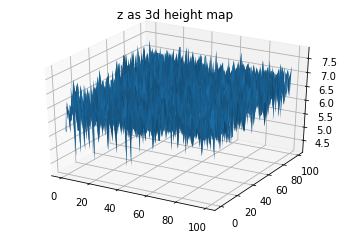

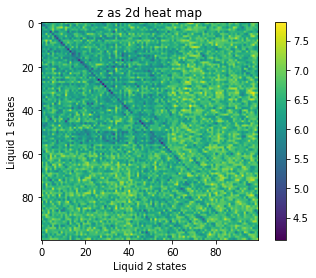

In [28]:
plot_distanceplane(automatas_history[2], automatas_history[3])

(100,)


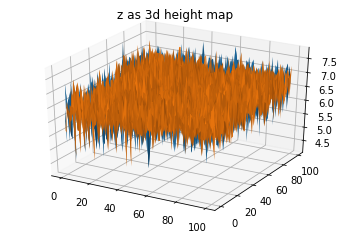

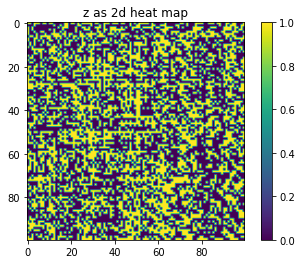

In [29]:
plot_distanceplane_comparsison([[automatas_history[0], automatas_history[1]],[automatas_history[2],automatas_history[3]]])

In [36]:

class Neurons:
    def __init__(self, membrane_decay, treshold_decay, membrane_treshold_resting_distance, population_size_x, population_size_y, neighbourhoodTemplate, scaling = False):
        self.membrane_decay = membrane_decay
        self.threshold_decay = treshold_decay
        self.m_t_resting_distance = membrane_treshold_resting_distance
        
        self.membrane_potentials = np.zeros((population_size_x, population_size_y))
        self.spiked_membrane_potentials = np.zeros((population_size_x, population_size_y))
        self.unspiked_membrane_potentials = np.zeros((population_size_x, population_size_y))
                                                     
        self.thresholds = np.zeros((population_size_x, population_size_y))
        self.spiked_thresholds = np.zeros((population_size_x, population_size_y))
        self.unspiked_thresholds = np.zeros((population_size_x, population_size_y))
        
        self.spiked_neurons = np.zeros((population_size_x, population_size_y))
        self.unspiked_neurons = np.zeros((population_size_x, population_size_y))
        
        
        self.neighbourhood_template = neighbourhood_template
        self.connection_array = np.zeros((population_size_x, population_size_y, int(np.sum(np.sum(neighbourhood_template)))))
        self.weights_array = np.abs(np.random.normal(0.0, 0.8,(population_size_x, population_size_y, int(np.sum(np.sum(neighbourhood_template))))))
        
        self.scaling = scaling
        
    def input_excitatory(self, excitatory_inputs, scaling = False):
        if scaling == True:
            Upper = 1
            Lower = 0
            excitatory_inputs = ((Upper - Lower) * (excitatory_inputs - np.amin(inputs)))/((np.amax(inputs) - np.amin(inputs)) + 0.00000001)
        
        self.membrane_potentials[:,:] = self.membrane_potentials + excitatory_inputs
    
    def input_inhibitory(self, inhibitory_inputs):
        self.thresholds[:,:] = self.thresholds + inhibitory_inputs
        
    def compute_spikes(self):
        
        
        # Calculates which neurons spikes and which does not
        self.spiked_neurons[:,:] = self.membrane_potentials > self.thresholds
        self.unspiked_neurons[:,:] = self.spiked_neurons == 0
        
        # Calculates the new threshold value for all neurons that spiked
        self.spiked_thresholds[:,:] = (self.thresholds + self.threshold_decay * self.membrane_potentials)*self.spiked_neurons
        # Calclulates the thresholds of neurons that did not spike
        self.unspiked_thresholds[:,:] = (self.thresholds + self.threshold_decay * self.membrane_potentials) * self.unspiked_neurons
        
        self.thresholds = self.spiked_thresholds + self.unspiked_thresholds
        
        self.thresholds = self.thresholds + ((self.m_t_resting_distance - self.thresholds)/2)*self.threshold_decay
         
         
        self.membrane_potentials[:,:] = self.membrane_potentials * self.membrane_decay * self.unspiked_neurons
    
    def compute_lateral_connections(self, inputs):
        self.connect(self.spiked_neurons)
        
        inputs = (inputs + np.sum(self.connection_array,2)) > 0
        
        self.input_excitatory(inputs)
    
    def connect(self, inputs):
        midX = int(-self.neighbourhood_template.shape[0]/2)
        midY = int(-self.neighbourhood_template.shape[1]/2)
        
        level = 0
        for i0 in range(self.neighbourhood_template.shape[0]):
            for i1 in range(self.neighbourhood_template.shape[1]):
                if self.neighbourhood_template[i0,i1] == 1:
    
                    inputs_rolled = np.roll(inputs, midX + i0, axis = 0)
                    inputs_rolled = np.roll(inputs_rolled, midY + i1, axis = 1)
                    self.connection_array[:,:,level] = inputs_rolled
    
                    level += 1
        self.connection_array = self.connection_array*self.weights_array


'''
######################################
'''

neighbourhood_template = np.ones((5,5))
neighbourhood_template[2,2] = 0
#neighbourhood_template[0,:] = 0
#neighbourhood_template[1,:] = 0

'''
#######################
play around with these settings to change the neuron behaviour:)
######################
'''
population_x = 90
population_y = 90

membrane_decay = 0.8
treshold_decay = 0.5
mebrane_treshold_resting_distance = 0.5
#neighbourhood_template = np.ones((1,1))
#neighbourhood_template[1,1] = 0
'''
#####################################
'''

neuron_population_1 = Neurons(membrane_decay, treshold_decay, mebrane_treshold_resting_distance, population_x, population_y, neighbourhood_template)
neuron_population_2 = Neurons(0.3, treshold_decay, mebrane_treshold_resting_distance, population_x, population_y, neighbourhood_template)
neuron_population_3 = Neurons(0.4, treshold_decay, mebrane_treshold_resting_distance, population_x, population_y, neighbourhood_template)
neuron_population_4 = Neurons(0.5, 0.9, mebrane_treshold_resting_distance, population_x, population_y, neighbourhood_template)




In [37]:

nr_of_starting_states = 4
starting_state = np.random.rand(nr_of_starting_states, population_x, population_y)<0.5


sim_length = 100
neuron_histories = np.zeros((nr_of_starting_states, population_x*population_y, sim_length))

for i0 in range(nr_of_starting_states):
    injections_t = 0
    if i0 <=1:
        neuron_population_1.spiked_neurons = starting_state[0]
    else:
        neuron_population_1.spiked_neurons = starting_state[i0]
    for i1 in range(sim_length):
        neuron_histories[i0,:,i1] = np.ndarray.flatten(neuron_population_1.spiked_neurons)
        if i1 < injection_end and i1 > injection_start:
            neuron_population_1.spiked_neurons[:,0] = injections[i0][:,injections_t]
            injections_t += 1
        neuron_population_1.compute_lateral_connections(neuron_population_1.spiked_neurons)
        #neuron_population_2.compute_lateral_connections(neuron_population_1.spiked_neurons)
        #neuron_population_3.compute(neuron_population_2.spiked_neurons)
        #neuron_population_4.compute_lateral_connections(neuron_population_3.spiked_neurons)
        #neuron_population_1.compute(neuron_population_4.spiked_neurons)


    

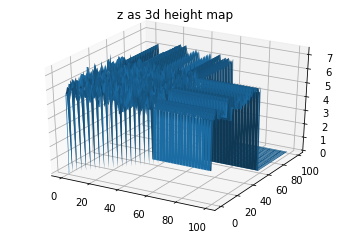

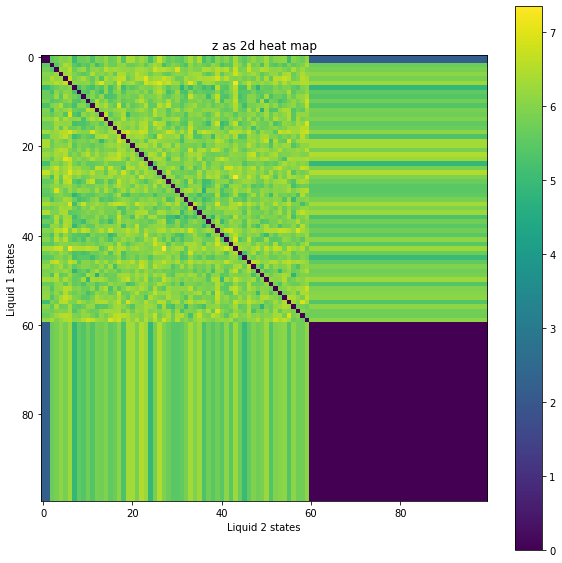

In [38]:
plot_distanceplane(neuron_histories[1], neuron_histories[1], colormap_size = (10,10))

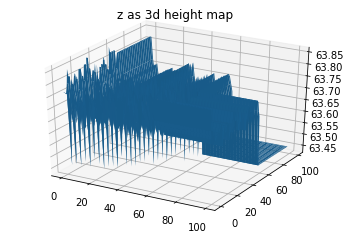

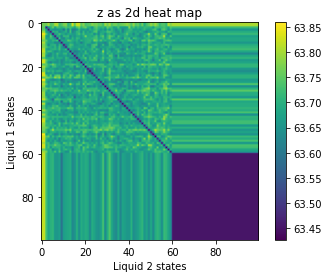

In [39]:
plot_distanceplane(neuron_histories[2], neuron_histories[3])

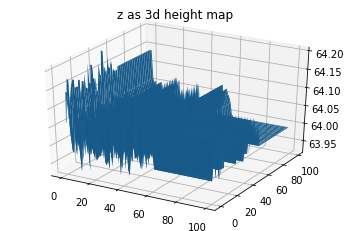

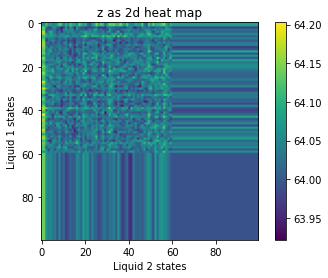

In [40]:
plot_distanceplane(neuron_histories[0], neuron_histories[3])

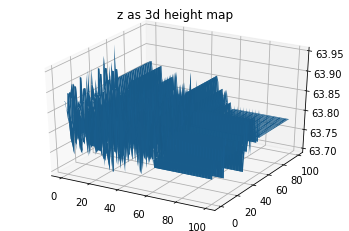

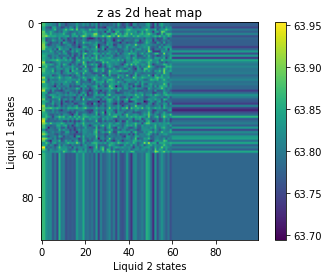

In [41]:
plot_distanceplane(neuron_histories[1], neuron_histories[2])

In [50]:
def historywise_overlap(liquid_1_history, liquid_2_history):
    # inputs are 2D arrays containing the states of a liquid over time. Axis 0 is the liquid and axis 1 is time
    
    # To quickly compute all possible comparisons the 2D arrays are repeated over a new axis (axis 2) such that axis 2
    # contains a number of repeats of the liquid history equal to the time steps in the other liquid history (the time steps should be the same for both liquids)
    block_1 = np.repeat(liquid_1_history[:,:,np.newaxis],liquid_2_history.shape[1], axis = 2)
   
    block_2 = np.repeat(liquid_2_history[:,:,np.newaxis],liquid_1_history.shape[1], axis = 2)

    # One of the cubes created above is then rotated such that the states align so that comparisons can be made between all states
    # To do: explain better
    block_overlap = block_1 + np.rot90(block_2,1,(1,2)) 
    block_overlap = block_overlap == 2
    return np.sum(block_overlap,0)

In [53]:
def historywise_overlap(liquid_1_history, liquid_2_history):
    # inputs are 2D arrays containing the states of a liquid over time. Axis 0 is the liquid and axis 1 is time
    
    # To quickly compute all possible comparisons the 2D arrays are repeated over a new axis (axis 2) such that axis 2
    # contains a number of repeats of the liquid history equal to the time steps in the other liquid history (the time steps should be the same for both liquids)
    block_1 = np.repeat(liquid_1_history[:,:,np.newaxis],liquid_2_history.shape[1], axis = 2)
   
    block_2 = np.repeat(liquid_2_history[:,:,np.newaxis],liquid_1_history.shape[1], axis = 2)

    # One of the cubes created above is then rotated such that the states align so that comparisons can be made between all states
    # To do: explain better
    block_overlap_1 = block_1 + np.rot90(block_2,1,(1,2)) 
    block_overlap = block_overlap_1 == 2
    return np.sum(block_overlap,0)/np.sum(block_overlap_1,0)

In [43]:
def historywise_non_overlap(liquid_1_history, liquid_2_history):
    # inputs are 2D arrays containing the states of a liquid over time. Axis 0 is the liquid and axis 1 is time
    
    # To quickly compute all possible comparisons the 2D arrays are repeated over a new axis (axis 2) such that axis 2
    # contains a number of repeats of the liquid history equal to the time steps in the other liquid history (the time steps should be the same for both liquids)
    block_1 = np.repeat(liquid_1_history[:,:,np.newaxis],liquid_2_history.shape[1], axis = 2)
   
    block_2 = np.repeat(liquid_2_history[:,:,np.newaxis],liquid_1_history.shape[1], axis = 2)

    # One of the cubes created above is then rotated such that the states align so that comparisons can be made between all states
    # To do: explain better
    block_overlap = block_1 + np.rot90(block_2,1,(1,2)) 
    block_overlap = block_overlap == 1
    return np.sum(block_overlap,0)

In [44]:
def plot_overlap_plane(liquid_1_history, liquid_2_history, color_range = None, colormap_size = None):

    z = historywise_overlap(liquid_1_history, liquid_2_history)

    x, y = np.meshgrid(range(z.shape[0]), range(z.shape[1]))

    # show hight map in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if color_range != None:
        ax.set_zlim(color_range[0],color_range[1])
    ax.plot_surface(x, y, z)
    plt.title('z as 3d height map')
    plt.show()

    # show hight map in 2d
    if colormap_size != None:
        plt.figure(figsize = colormap_size)
    else:
        plt.figure()
    plt.title('z as 2d heat map')
    if color_range != None:
        p = plt.imshow(z, vmin = color_range[0], vmax = color_range[1])
    else:
        p = plt.imshow(z)
    plt.ylabel("Liquid 1 states")
    plt.xlabel("Liquid 2 states")
    plt.colorbar(p)
    plt.show()

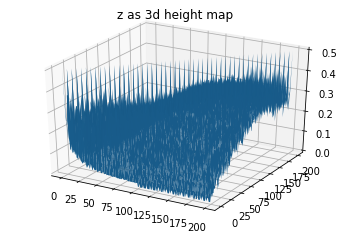

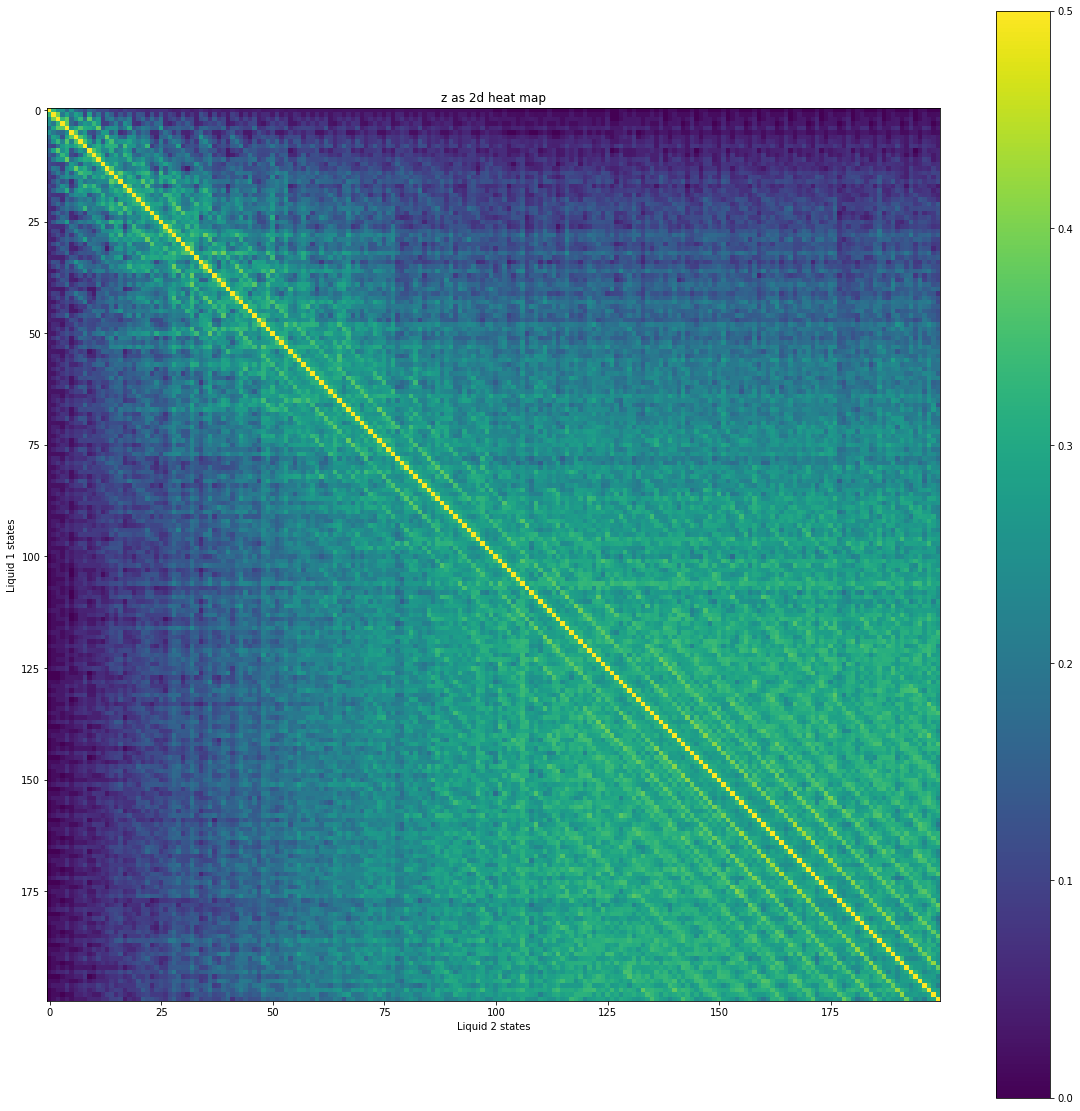

In [54]:
automata_rule_110 = Automata_1d(rule_comparison_starting_state, "110")

rule_comparison_sim_length = 200

rule_110_history = np.zeros((rule_comparison_size, rule_comparison_sim_length))

for i0 in range(rule_comparison_sim_length):
    rule_110_history[:,i0] = automata_rule_110.universe
    automata_rule_110.update_universe()

plot_overlap_plane(rule_110_history, rule_110_history, colormap_size = (20,20))


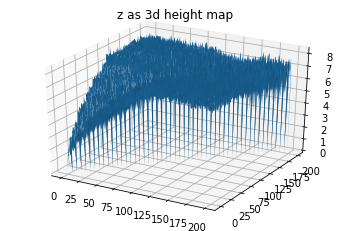

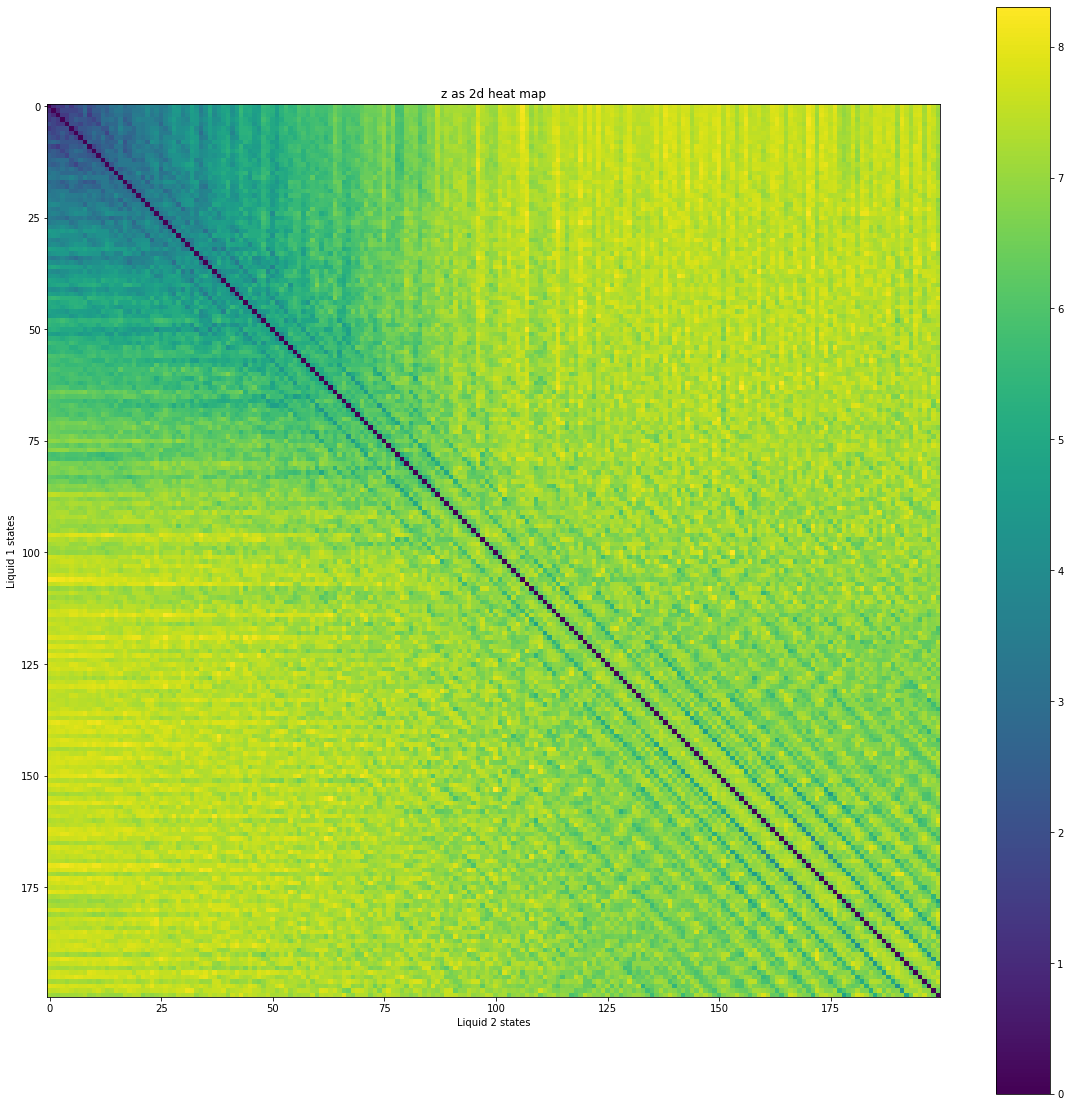

In [46]:
plot_distanceplane(rule_110_history, rule_110_history, colormap_size = (20,20))

In [47]:
import cv2
import matplotlib.pyplot as plt

In [48]:

cap = cv2.VideoCapture(0)




#Define initial input
#neuron_population.compute_lateral_connections(np.random.normal(1,1,(400,400)))
c = 0
while True:
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #neuron_population.spiked_neurons[200,200] = 1
    cv2.imshow('frame', frame)
    

    
    #neuron_population.compute(np.array(gray)) #compute_lateral_connections(np.array(gray/500)) #neuron_population.spiked_neurons)

    
  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Stop video 
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


## 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
universe_size = 1000
sim_length = 5000


starting_state = np.zeros(universe_size)
starting_state[4:6] = 1

rule = "110"
# initiate the cellular automata

automata = Automata_1d(starting_state, rule)

ratio_active = np.zeros(sim_length)

for i0 in range(sim_length):
    automata.update_universe()
    ratio_active[i0] = np.mean(automata.universe)

plt.plot(ratio_active)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
universe_size = 1000
sim_length = 100000


starting_state_1 = np.random.rand(universe_size) > 0.5
starting_state_2 = np.copy(starting_state_1)

'''
if starting_state_2[int(universe_size/2)] == 1:
    starting_state_2[int(universe_size/2)] = 0
else:
    starting_state_2[int(universe_size/2)] = 1  
    
'''

rule = "110"
# initiate the cellular automata

automata_1 = Automata_1d(starting_state_1, rule)
automata_2 = Automata_1d(starting_state_2, rule)

distance = np.zeros(sim_length)

for i0 in range(sim_length):
    distance[i0] = np.linalg.norm(automata_1.universe - automata_2.universe, 2)
    automata_1.update_universe()
    automata_2.update_universe()
    
    if i0 == 25000:
        if automata_2.universe[int(universe_size/2)] == 1:
            automata_2.universe[int(universe_size/2)] = 0
        else:
            automata_2.universe[int(universe_size/2)] = 1  


plt.plot(distance)
plt.show()

In [ ]:

'''
######################################
'''

neighbourhood_template = np.ones((5,5))
neighbourhood_template[2,2] = 0
#neighbourhood_template[0,:] = 0
#neighbourhood_template[1,:] = 0

'''
#######################
play around with these settings to change the neuron behaviour:)
######################
'''
population_x = 90
population_y = 90

membrane_decay = 0.5
treshold_decay = 0.8
mebrane_treshold_resting_distance = 0.38775
#neighbourhood_template = np.ones((1,1))
#neighbourhood_template[1,1] = 0
'''
#####################################
'''

neuron_population_1 = Neurons(membrane_decay, treshold_decay, mebrane_treshold_resting_distance, population_x, population_y, neighbourhood_template)
neuron_population_2 = Neurons(membrane_decay, treshold_decay, mebrane_treshold_resting_distance, population_x, population_y, neighbourhood_template)

starting_state_1 = np.random.rand(population_x, population_y)<0.5
#starting_state_1[46:,:] = 0
#starting_state_1[:44,:] = 0
starting_state_2 = np.copy(starting_state_1)

#if starting_state_1[45,45]  == 0:
#    starting_state_2[45,45] = 1
#else:
#    starting_state_2[45,45] = 0

sim_length = 500

neuron_population_1.spiked_neurons = starting_state_1
neuron_population_2.spiked_neurons = starting_state_2

distance = np.zeros(sim_length)
activity = np.zeros(sim_length)
                   
for i0 in range(sim_length):
    distance[i0] = np.linalg.norm(neuron_population_1.spiked_neurons*1 - neuron_population_2.spiked_neurons*1)
    activity[i0] = np.mean(neuron_population_1.spiked_neurons)
    if i0 < 50:
        neuron_population_2.spiked_neurons[0,0] = 1
        neuron_population_1.spiked_neurons[0,0] = 1
        if i0 > 40:
            neuron_population_2.spiked_neurons[0,0] = 0  
    neuron_population_1.compute_lateral_connections(neuron_population_1.spiked_neurons)
    neuron_population_2.compute_lateral_connections(neuron_population_2.spiked_neurons)

plt.figure()
plt.plot(distance, label = "distance")
plt.legend()
plt.figure()
plt.plot(activity, label ="activity")
plt.legend()
plt.show()
    
